# Ottawa Shootings Analysis

#### Exploring shootings and firearm related charges in Ottawa between 2016-2022

In [2]:
!pip install pydeck
!pip install pydeck geopandas pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.7 MB/s eta 0:00:00


In [9]:
# Import libraries
import geopandas as gpd
import pandas as pd
import pydeck as pdk
from google.colab import files

# Assume the file name is `shootings_data.geojson`
file_name = '/content/Shootings_and_Firearm_Discharges.geojson'

# Load the GeoJSON file using GeoPandas
geo_data = gpd.read_file(file_name)

# Convert GeoPandas GeoDataFrame to Pandas DataFrame
# Extract coordinates and other relevant fields
geo_data["longitude"] = geo_data.geometry.x
geo_data["latitude"] = geo_data.geometry.y
df = geo_data.drop(columns=["geometry"])

# Display the first few rows of the DataFrame
print(df.head())

# Create a HeatmapLayer
heatmap_layer = pdk.Layer(
    "HeatmapLayer",
    data=df,
    get_position="[longitude, latitude]",
    get_weight="Year",  # Example: Use the 'Year' column for weighting
    radiusPixels=50,    # Adjust the heatmap radius
)

# Define the view state (centered on the data's mean latitude/longitude)
view_state = pdk.ViewState(
    latitude=df["latitude"].mean(),
    longitude=df["longitude"].mean(),
    zoom=10,
    pitch=45,
)

# Create the Deck instance
r = pdk.Deck(layers=[heatmap_layer], initial_view_state=view_state)


   FID   ID  Year                Reported_D  Reported_T  \
0    1  232  2016 2016-01-03 00:00:00+00:00        1544   
1    2  408  2016 2016-01-03 00:00:00+00:00        2330   
2    3   53  2016 2016-01-07 00:00:00+00:00        1813   
3    4  244  2016 2016-01-08 00:00:00+00:00        1436   
4    5  465  2016 2016-01-11 00:00:00+00:00          55   

                 Occurrence  Occurren_1 Reported_W  Ottawa_Pol Ottawa_P_1  \
0 2016-01-03 00:00:00+00:00        2000     SUNDAY          24    Central   
1 2016-01-02 00:00:00+00:00        2330   SATURDAY          36       East   
2 2016-01-07 00:00:00+00:00        1813   THURSDAY          17       West   
3 2016-01-06 00:00:00+00:00        2330  WEDNESDAY          25    Central   
4 2016-01-10 00:00:00+00:00        2238     SUNDAY          25    Central   

   Census_Tra Census_T_1            X             Y  longitude   latitude  
0  5050052.00    0052.00  369577.7110  5.031820e+06 -75.672238  45.423320  
1  5050190.01    0190.01  3825

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
plt.style.use('dark_background')

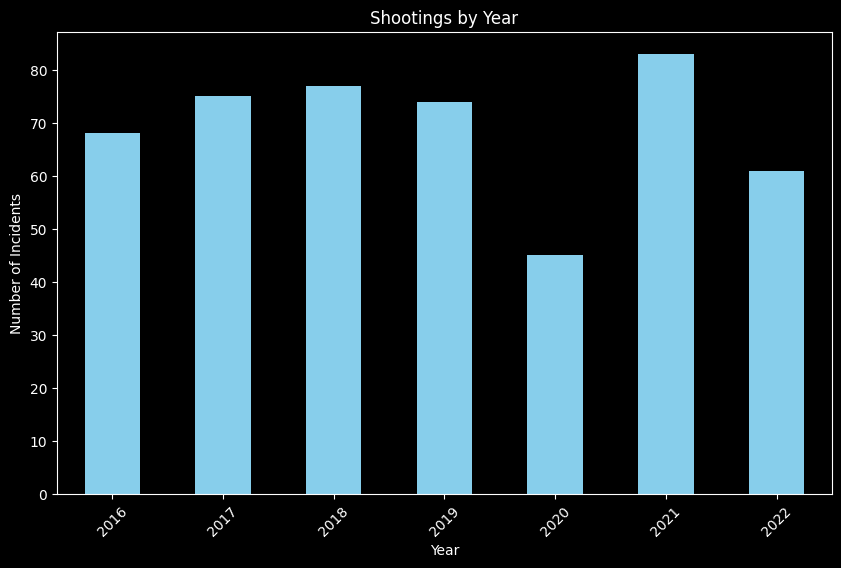

In [21]:
# Convert the 'Reported_D' column to datetime if it's not already
geo_data['Reported_D'] = pd.to_datetime(geo_data['Reported_D'])

# Group by year and count incidents
incidents_by_year = geo_data.groupby(geo_data['Reported_D'].dt.year).size()

import matplotlib.pyplot as plt

# Plotting incidents by year
plt.figure(figsize=(10, 6))
incidents_by_year.plot(kind='bar', color='skyblue')
plt.title('Shootings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

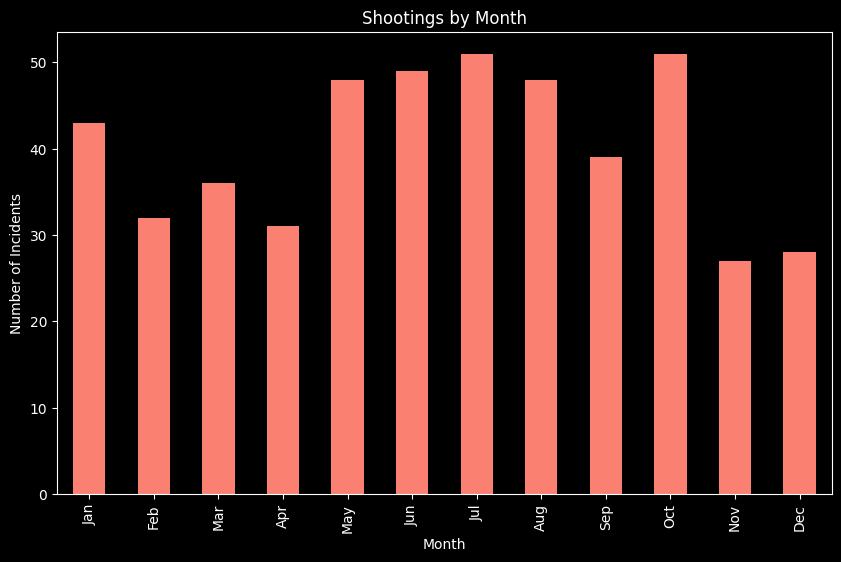

In [22]:
# Group by month and count incidents
incidents_by_month = geo_data.groupby(geo_data['Reported_D'].dt.month).size()

# Plotting incidents by month
plt.figure(figsize=(10, 6))
incidents_by_month.plot(kind='bar', color='salmon')
plt.title('Shootings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

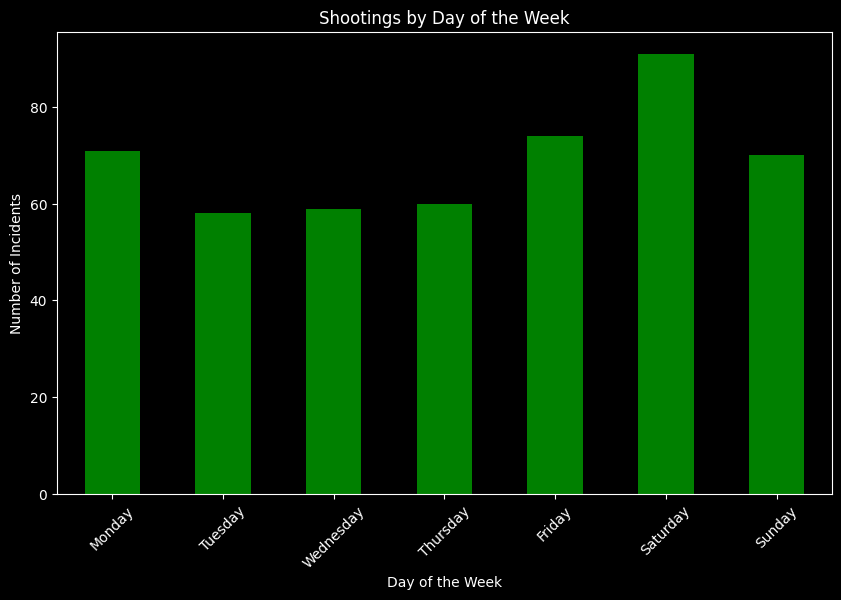

In [26]:
# Group by the day of the week and count incidents
incidents_by_day = geo_data.groupby(geo_data['Reported_D'].dt.day_name()).size()

# Define the correct order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the 'incidents_by_day' series to match the correct day order
incidents_by_day = incidents_by_day[day_order]

# Plotting incidents by day of the week
plt.figure(figsize=(10, 6))
incidents_by_day.plot(kind='bar', color='green')
plt.title('Shootings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

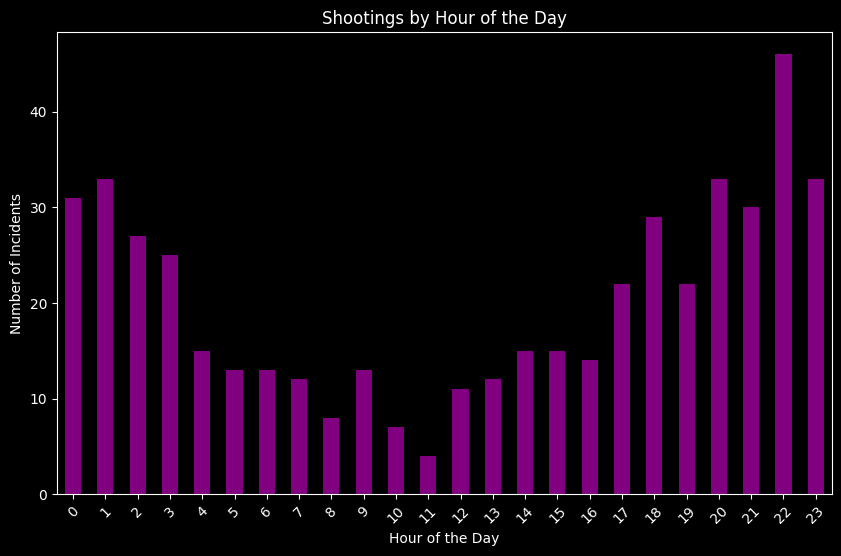

In [24]:
# Convert reported time to a string and extract hours
geo_data['Reported_T'] = geo_data['Reported_T'].astype(str).str.zfill(4)
geo_data['Hour'] = geo_data['Reported_T'].str[:2].astype(int)

# Group by hour and count incidents
incidents_by_hour = geo_data.groupby('Hour').size()

# Plotting incidents by hour
plt.figure(figsize=(10, 6))
incidents_by_hour.plot(kind='bar', color='purple')
plt.title('Shootings by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

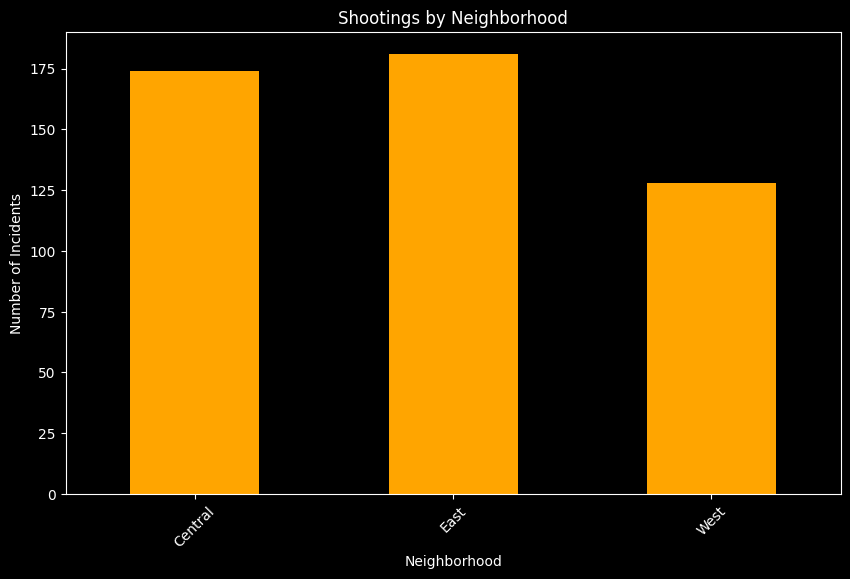

In [25]:
# Group by neighborhood and count incidents
incidents_by_neighborhood = geo_data.groupby('Ottawa_P_1').size()

# Plotting incidents by neighborhood
plt.figure(figsize=(10, 6))
incidents_by_neighborhood.plot(kind='bar', color='orange')
plt.title('Shootings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()
